# Performance Comparison of SHA-256, SHA-1, Blake2b, Blake2s, and etc.

### Author: labry (Justin Park)

0 sha256 performed 10000 operations in 12 [0.016764163970947266, 0.020440101623535156, 0.05110001564025879, 0.08106803894042969, 0.11389708518981934, 0.1446678638458252, 0.17509698867797852, 0.20996594429016113, 0.23365497589111328, 0.26406192779541016, 0.2955188751220703, 0.3323509693145752] 

1 sha1 performed 10000 operations in 12 [0.01690983772277832, 0.016708850860595703, 0.030823945999145508, 0.044821977615356445, 0.06588482856750488, 0.07908320426940918, 0.09189724922180176, 0.10562801361083984, 0.12238883972167969, 0.13626885414123535, 0.14696478843688965, 0.16137123107910156] 

2 blake2b performed 10000 operations in 12 [0.012921810150146484, 0.013875961303710938, 0.029422998428344727, 0.04559016227722168, 0.0643153190612793, 0.08154773712158203, 0.09621500968933105, 0.12135910987854004, 0.13307690620422363, 0.14447593688964844, 0.1560361385345459, 0.17573308944702148] 

3 blake2s performed 10000 operations in 12 [0.010807991027832031, 0.01227879524230957, 0.030143022537231445

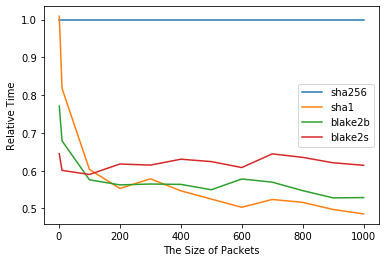

In [1]:
from hashcompare import Hash
from hashlib import sha1, sha256, blake2b, blake2s, sha3_224, md5
from zlib import crc32
import time
import inspect
import numpy as np
import copy

## Simulation Set-up 
#### simulated_packet denotes 10 byte
#### x_range denotes 1 to 1000 times the size of the simulated_packet
#### The smallest being 10 bytes and the largest being 10000 bytes or 10k bytes

In [2]:
x_range = [100,200,300,400,500,600,700,800, 900, 1000]
names_of_hashes = ['sha256','sha1','blake2b','blake2s','sha3_224', 'md5']

hash_mapper = [Hash(sha256(),names_of_hashes[0]), Hash(sha1(),names_of_hashes[1]),
               Hash(blake2b(),names_of_hashes[2]), Hash(blake2s(), names_of_hashes[3]), 
               Hash(sha3_224(), names_of_hashes[4]), Hash(md5(),names_of_hashes[5])]
hash_mapper = np.array(hash_mapper)

test_mapper = [Hash(sha256(),names_of_hashes[0]), Hash(sha1(),names_of_hashes[1]),
               Hash(blake2b(),names_of_hashes[2]), Hash(blake2s(), names_of_hashes[3]), 
               Hash(sha3_224(), names_of_hashes[4]), Hash(md5(),names_of_hashes[5])]
test_mapper = np.array(test_mapper)

simulated_packet = "abcdefghij"
packet= []
for weight in x_range:
    packet.append(simulated_packet * weight)
    
for idx, hash_f in enumerate(hash_mapper):

    for i in range(len(x_range)):
        hash_mapper[idx].set_start(time.time())
        for j in range(Hash.NUM_OF_ROUNDS):
            #packet = simulated_packet*i
            hash_f.update(packet[i].encode())
            hash_v = hash_f.digest()

        hash_mapper[idx].set_finish(time.time())

    print("{} {} performed {} operations in {} {} \n".format
        (idx, hash_mapper[idx].get_name(), Hash.NUM_OF_ROUNDS,  len(hash_mapper[idx].get_duration()), hash_mapper[idx].get_duration()))

0 sha256 performed 10000 operations in 10 [0.05350804328918457, 0.09982013702392578, 0.11357998847961426, 0.14837098121643066, 0.17493200302124023, 0.203078031539917, 0.2353358268737793, 0.2651979923248291, 0.3142580986022949, 0.3255460262298584] 

1 sha1 performed 10000 operations in 10 [0.031224727630615234, 0.04337811470031738, 0.0628502368927002, 0.07713198661804199, 0.09020423889160156, 0.10433816909790039, 0.12054300308227539, 0.1375579833984375, 0.14695096015930176, 0.1600940227508545] 

2 blake2b performed 10000 operations in 10 [0.03012394905090332, 0.045233726501464844, 0.06331324577331543, 0.07963919639587402, 0.0978398323059082, 0.11330199241638184, 0.1296403408050537, 0.14537596702575684, 0.15610790252685547, 0.17158007621765137] 

3 blake2s performed 10000 operations in 10 [0.0312960147857666, 0.04932999610900879, 0.07047295570373535, 0.09249472618103027, 0.1080009937286377, 0.12824773788452148, 0.15233302116394043, 0.1693098545074463, 0.1867389678955078, 0.20515298843383

# How many second does it take to perform one hashing?
#### It takes about one millionth of a second for one hashing to be performed.

In [3]:
import base58 

hash_v = np.zeros(len(names_of_hashes),dtype=object)
for idx, hash_f in enumerate(test_mapper):
    test_mapper[idx].set_start(time.time())
    for j in range(100000):
        hash_f.update(packet[0].encode())
        hash_v[idx] = hash_f.digest()
    test_mapper[idx].set_finish(time.time())

for idx, hash_f in enumerate(test_mapper):
    print("{} performed 1 operation in {}".format(test_mapper[idx].get_name(), test_mapper[idx].get_duration()[0]))
    print("{}... is hashed to {} long {}".format(packet[0][0:10], len(hash_v[idx].hex()), hash_v[idx].hex()))
    print("{}".format(str(base58.b58encode(hash_v[idx])))
    print("\n")


SyntaxError: invalid syntax (<ipython-input-3-011cdd128037>, line 15)

## Measure arithmetic calculations one million times

In [ ]:
start = time.time()
for i in range(1000000):
    finish = time.time()
    random1 = finish * 12 / 3.0 + 1234
    random2 = start * 124 / 4.2  + 234
    random3 = finish * 324 / 3.4 + 2344
    random4 = start * 2346 / 5.2 + 424324
    random6 = finish * 42310 / 13.0 + 23423432
    random7 = start * 12349 / 14.2 + 232.033
    random8 = finish * 4448 / 13.4 
    random9 = start * 12347 / 25.2
    duration = finish - start

print("performed operation in {} \n".format(duration))

## Graph Analysis

In [ ]:
default_duration = np.array(hash_mapper[0].get_duration())

import pandas as pd
import matplotlib.pyplot as plt
default_duration = pd.DataFrame(default_duration)

In [ ]:

#print(len(x_range))
zero_data = np.zeros(shape=(12,1))
zero_series = pd.Series(zero_data[:,0])
#print(zero_series)
plot_result2 = pd.DataFrame({names_of_hashes[0]: zero_series, names_of_hashes[1]: zero_series,
                   names_of_hashes[2]: zero_series, names_of_hashes[3]: zero_series}, index=x_range)
#print(plot_result2)
for idx, hash_f in enumerate(hash_mapper):
    plot_result2[names_of_hashes[idx]] = np.array(hash_mapper[idx].get_duration()[0])
    #print(hash_mapper[idx].get_duration())

plot_result2.plot()
print(plot_result2)    

#### Sha-256 is used as the baseline performance measurement unit and the Y-axis shows the relative time they needed to perform a hashing. X-axis show the packet size and the unit is 10 bytes, meaning 200 denotes 2k bytes, 400 4k bytes and so on.
#### The graph shows that sha-1 has the best performance for larger packets. However, sha-1 is known to be vulnerable due to high probability of hash colision.

In [ ]:
plot_result = pd.DataFrame(columns=names_of_hashes)
relative_performance = {}
for idx, hash_f in enumerate(hash_mapper):
    hash_mapper[idx].duration = pd.DataFrame(hash_mapper[idx].get_duration())
    hash_mapper[idx].duration.name = hash_mapper[idx].get_name()

    relative_performance.update({idx: hash_mapper[idx].get_duration()/default_duration})
    alist = []
    for item in relative_performance[idx].values:
        alist.append(item)
    col_name = hash_mapper[idx].get_name()
    data = pd.Series(alist,name=col_name)
    plot_result[col_name] = data.astype(float)


In [ ]:
ax = plot_result.plot()
ax.set_xlabel("The Size of Packets")
ax.set_ylabel("Relative Time")
ax.legend(loc='center right')
plt.show()